<a href="https://colab.research.google.com/github/mateoesteva/Proyectos-Mateo/blob/main/Solucion_Reto_SC_63_Mateo_Esteva_Grimladi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/TLG/Aprendizaje supervisado/bank_marketing_RETO_DS_AS.csv',sep = ',',header='infer')
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB
None
   age            job  marital  education default  balance housing loan  \
0   31  self-employed

Podemos observar que se trata de un problema de clasificación binaria. El dataset que tenemos se compone de 16 variables de entrada
(sin valores faltantes) y una de salida (la cuál indica si el cliente se ha suscrito a un servicio que brinda determinado banco).

6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

In [4]:
#primero separamos el dataset en variables de entrada y de salida

X = data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
y = data['y'].ravel()

#print(X['education'].value_counts())

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
enc = LabelEncoder()

cols = X.select_dtypes(include='int64').columns
# print(cols)

for col in X.select_dtypes(include='object'):
  enc.fit(X[col])
  X[col] = enc.transform(X[col])


#print(X['education'].value_counts())

/tmp/ipython-input-1791010184.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = data['y'].ravel()
/tmp/ipython-input-1791010184.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = enc.transform(X[col])
/tmp/ipython-input-1791010184.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = enc.transform(X[col])
/tmp/ipython-input-1791010184.py:16: SettingWithCopyWarning

In [5]:
X.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        9000 non-null   int64
 1   job        9000 non-null   int64
 2   marital    9000 non-null   int64
 3   education  9000 non-null   int64
 4   default    9000 non-null   int64
 5   balance    9000 non-null   int64
 6   housing    9000 non-null   int64
 7   loan       9000 non-null   int64
 8   contact    9000 non-null   int64
 9   day        9000 non-null   int64
 10  month      9000 non-null   int64
 11  duration   9000 non-null   int64
 12  campaign   9000 non-null   int64
 13  pdays      9000 non-null   int64
 14  previous   9000 non-null   int64
 15  poutcome   9000 non-null   int64
dtypes: int64(16)
memory usage: 1.1 MB


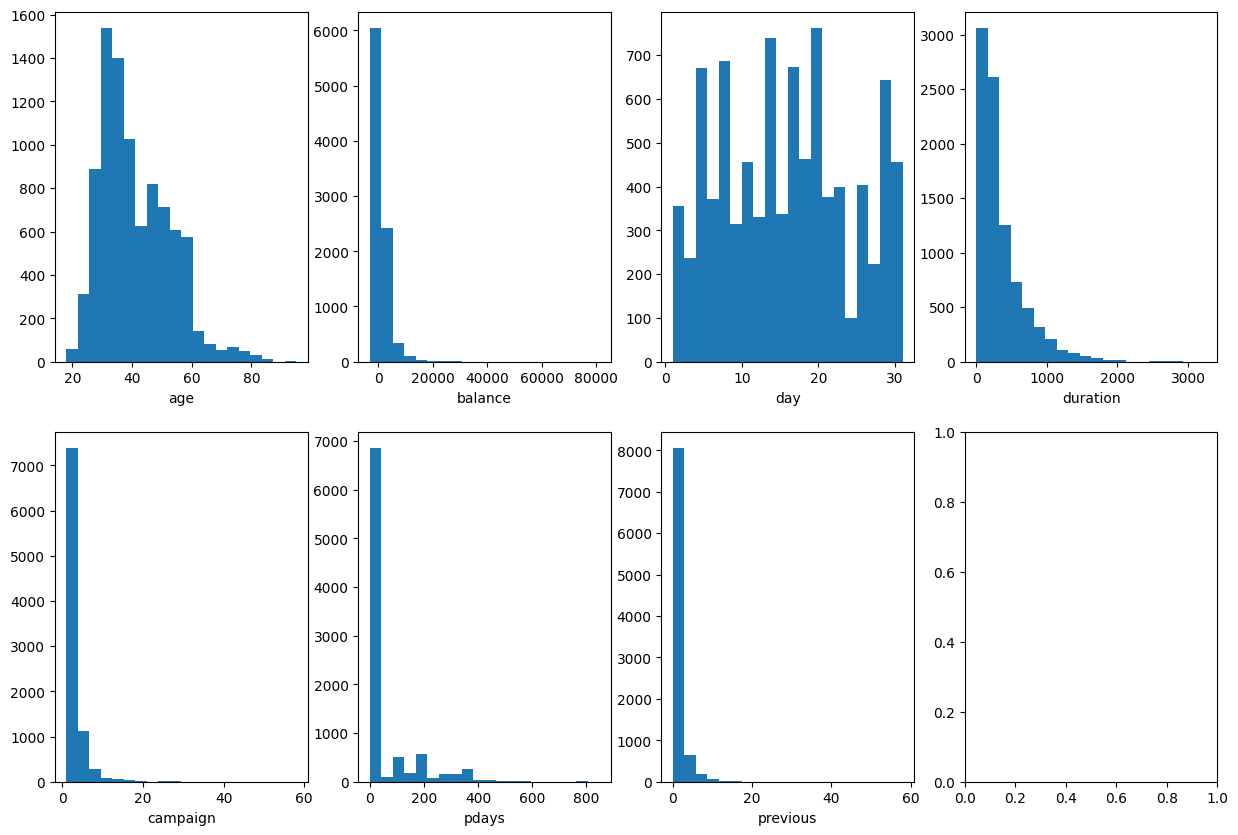

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(X[cols]):
    axes[i].hist(X[col], bins=20)
    axes[i].set_xlabel(col)

plt.show()

A excepción de day, todas las columnas numéricas tienen sesgo a la derecha.

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


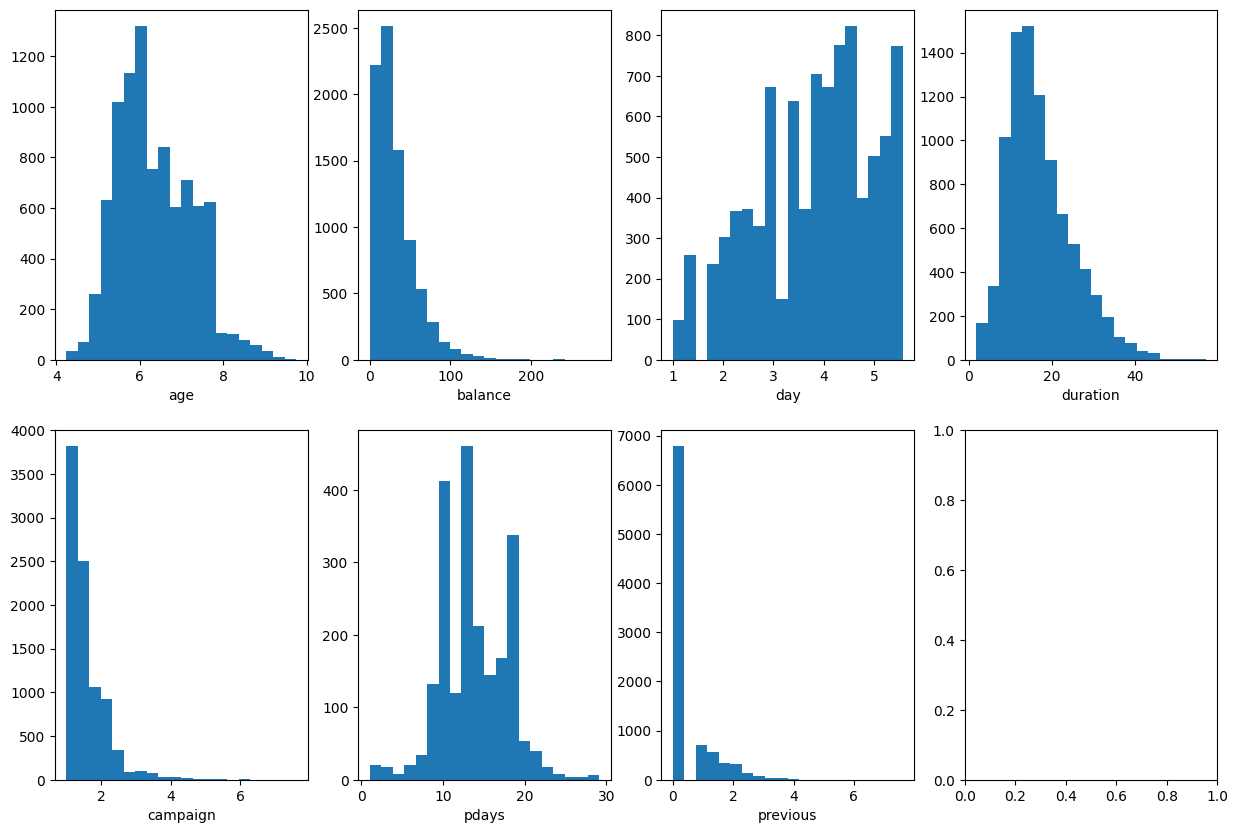

In [8]:
def fun1(X):
  return np.log(X + 1)
def fun2(X):
  return (X - np.mean(X)) / np.std(X)
def fun3(X):
  return (X - np.min(X)) / (np.max(X) - np.min(X))


fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(X[cols]):
    axes[i].hist(np.sqrt(X[col]), bins=20)
    axes[i].set_xlabel(col)

plt.show()


# for col in cols:
#   plt.hist(np.log(X[col] + 1), bins=25)
#   plt.xlabel(f"Log {col}")
#   plt.show()

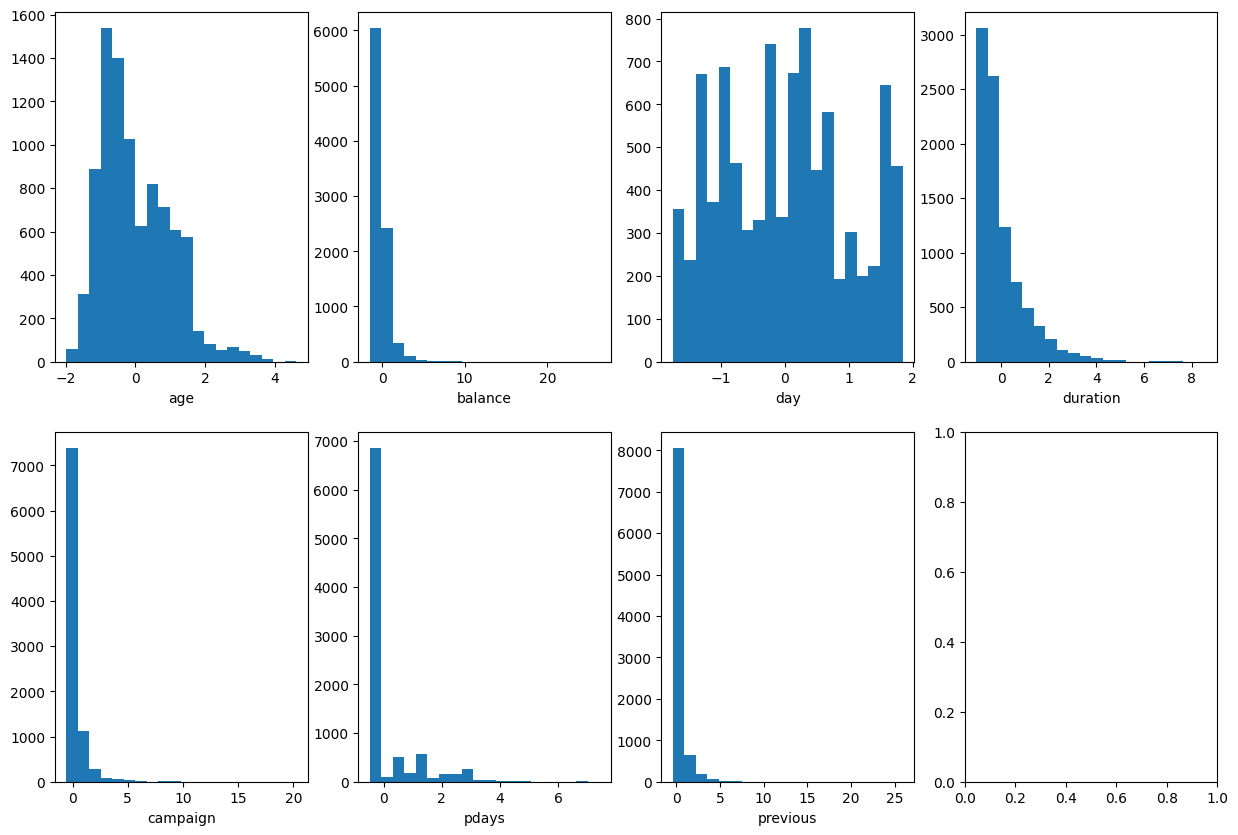

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(X[cols]):
    axes[i].hist(fun2(X[col]), bins=20)
    axes[i].set_xlabel(col)

plt.show()

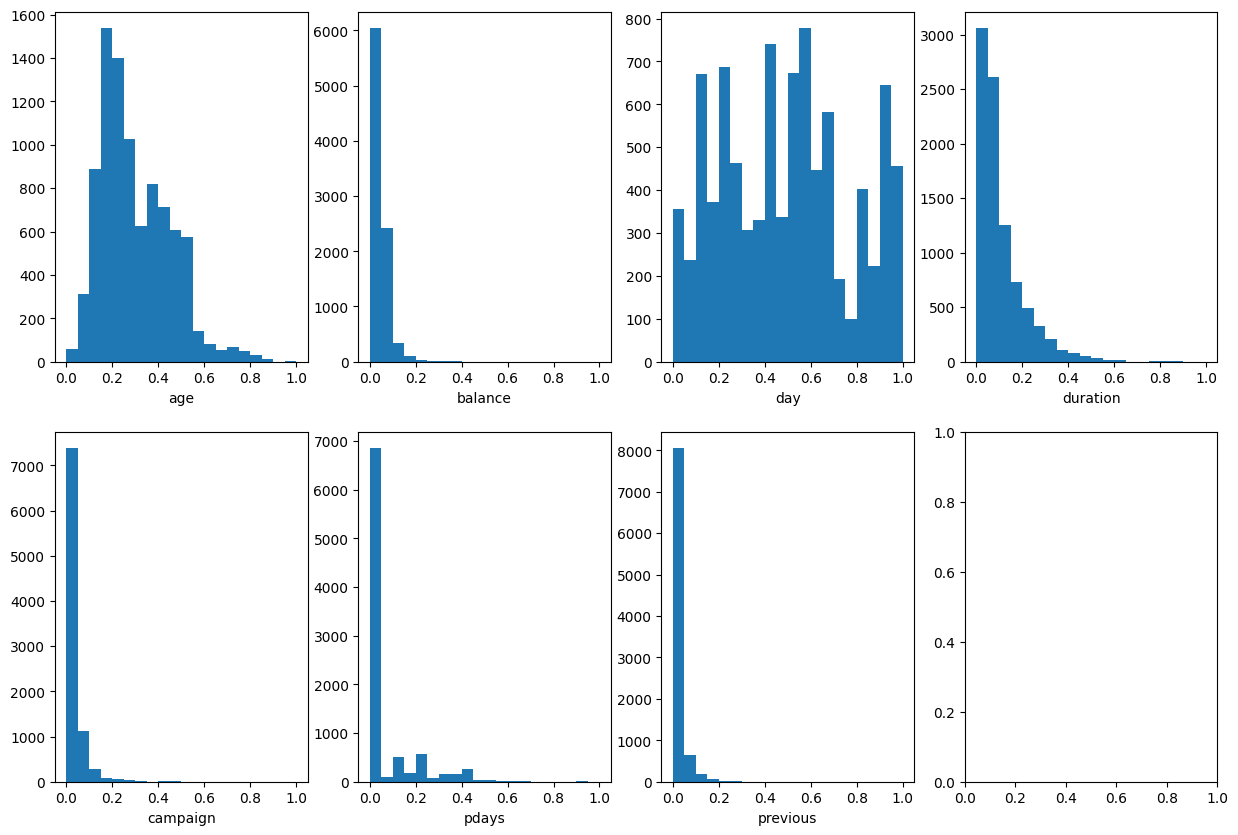

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(X[cols]):
    axes[i].hist(fun3(X[col]), bins=20)
    axes[i].set_xlabel(col)

plt.show()

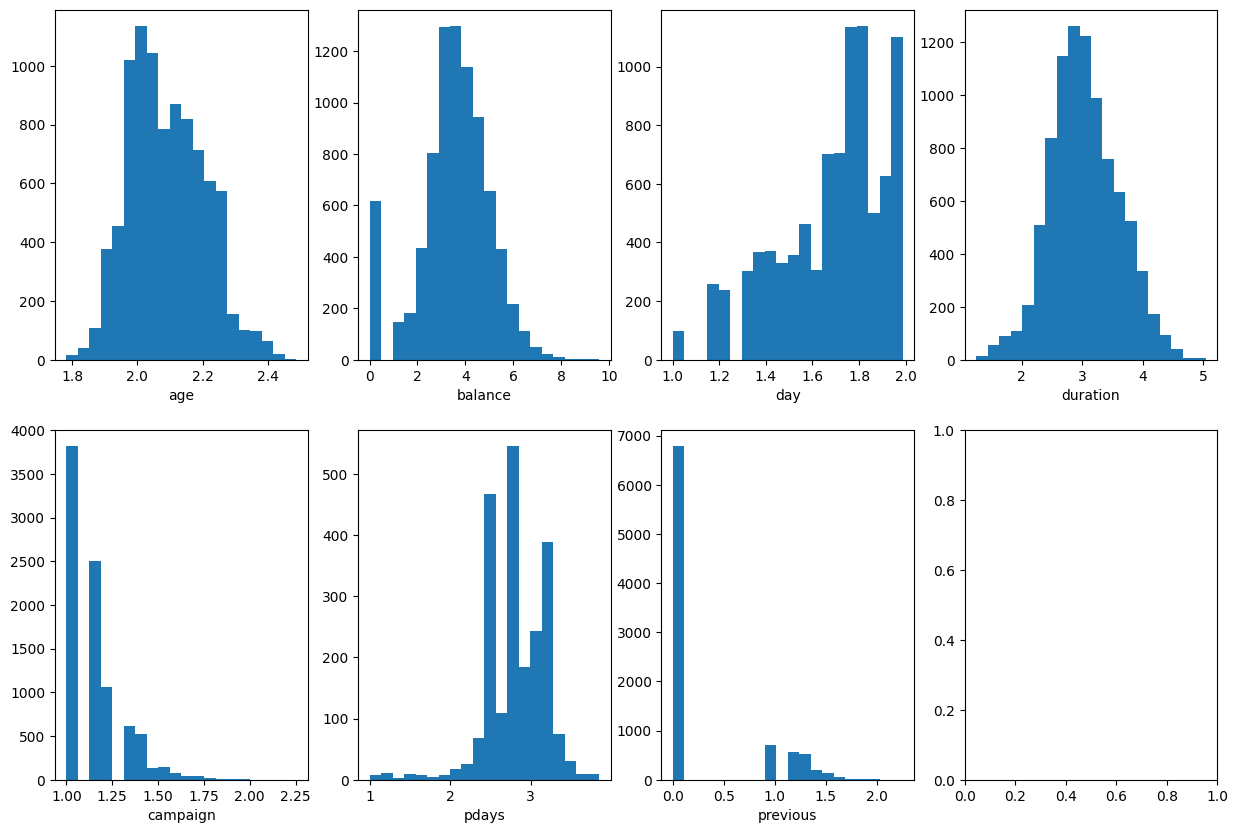

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

def fun4(X):
  return np.power(X, 0.2)

axes = axes.flatten()

for i, col in enumerate(X[cols]):
    axes[i].hist((fun4(X[col])), bins=20)
    axes[i].set_xlabel(col)

plt.show()

la función que regresó los mejores resultados fue la fun4.

In [12]:
cnum = ['age','balance','duration','campaign','pdays','previous']

for col in cnum:
  X[col] = fun4(X[col])



/tmp/ipython-input-1194664619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = fun4(X[col])


9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [13]:
from sklearn.model_selection import train_test_split

x_train_validation, x_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_validation, y_train_validation, test_size=0.25, random_state=11)

# print(x_train.shape)
# print(x_validation.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_validation.shape)
# print(y_test.shape)

10.	Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)
x_validation = imputer.transform(x_validation)
x_test = imputer.transform(x_test)


clf = LogisticRegression(C=1.0, solver='newton-cg')
modelo_RL = clf.fit(x_train, y_train)

print('Regresion logística:\nExactitud (accuracy) con el conjunto de validación = ', modelo_RL.score(x_validation, y_validation) )

Regresion logística:
Exactitud (accuracy) con el conjunto de validación =  0.8172222222222222


In [15]:
pr = modelo_RL.predict(x_validation)
confusion_matrix(y_validation, pr)

array([[895, 145],
       [184, 576]])

In [16]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solvers:

  clf = LogisticRegression(C=1.0, solver=solver)
  modelo_RL = clf.fit(x_train, y_train)

  print(f'Regresion logística:\nExactitud (accuracy) con el conjunto solver {solver} = ', modelo_RL.score(x_validation, y_validation) )

  pr = modelo_RL.predict(x_validation)
  # print(confusion_matrix(y_validation, pr))

Regresion logística:
Exactitud (accuracy) con el conjunto solver lbfgs =  0.8088888888888889
Regresion logística:
Exactitud (accuracy) con el conjunto solver liblinear =  0.8138888888888889


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresion logística:
Exactitud (accuracy) con el conjunto solver newton-cg =  0.8172222222222222
Regresion logística:
Exactitud (accuracy) con el conjunto solver newton-cholesky =  0.8172222222222222


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Regresion logística:
Exactitud (accuracy) con el conjunto solver sag =  0.8088888888888889
Regresion logística:
Exactitud (accuracy) con el conjunto solver saga =  0.8072222222222222


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
logModel = LogisticRegression()

param_grid = [{ 'penalty' : ['l1', 'l2','elasticent','none'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['lbfgs', 'liblinear','newton-cg','sag','saga'],
               'max_iter' : [100, 1000,2500, 5000]
             }]

In [18]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

In [19]:
best_clf.best_estimator_

LogisticRegression(C=np.float64(0.615848211066026), max_iter=1000, solver='sag')

In [20]:
best_clf.best_params_

{'C': np.float64(0.615848211066026),
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'sag'}

In [21]:
clf = LogisticRegression(C=np.float64(0.615848211066026), max_iter=1000, penalty='l2', solver='sag')
modelo_RL = clf.fit(x_train, y_train)


print('Regresion logística:\nExactitud (accuracy) con el conjunto de validación = ', modelo_RL.score(x_validation, y_validation) )

pr = modelo_RL.predict(x_validation)

print('Matriz de confusión:\n', confusion_matrix(y_validation, pr) )

Regresion logística:
Exactitud (accuracy) con el conjunto de validación =  0.8188888888888889
Matriz de confusión:
 [[898 142]
 [184 576]]


11.	Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [24]:
#primero separamos el dataset en variables de entrada y de salida

X = data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
y = data['y'].map({'yes': 1, 'no': 0}).values

#print(X['education'].value_counts())

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
enc = LabelEncoder()

cols = X.select_dtypes(include='int64').columns
# print(cols)

for col in X.select_dtypes(include='object'):
  enc.fit(X[col])
  X[col] = enc.transform(X[col])


#print(X['education'].value_counts())
def fun4(X):
  return np.power(X, 0.2)

cnum = ['age','balance','duration','campaign','pdays','previous']

for col in cnum:
  X[col] = fun4(X[col])

from sklearn.model_selection import train_test_split

x_train_validation, x_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_validation, y_train_validation, test_size=0.25, random_state=11)

# print(x_train.shape)
# print(x_validation.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_validation.shape)
# print(y_test.shape)

/tmp/ipython-input-409771604.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = enc.transform(X[col])
/tmp/ipython-input-409771604.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = enc.transform(X[col])
/tmp/ipython-input-409771604.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

>1, train: 0.580, test: 0.578, losstrain: 0.420, losstest: 0.422
[[1040    0]
 [ 760    0]]
>6, train: 0.766, test: 0.756, losstrain: 0.234, losstest: 0.244
[[917 123]
 [317 443]]
>11, train: 0.785, test: 0.788, losstrain: 0.215, losstest: 0.212
[[859 181]
 [201 559]]
>16, train: 0.782, test: 0.786, losstrain: 0.218, losstest: 0.214
[[870 170]
 [216 544]]
>21, train: 0.752, test: 0.741, losstrain: 0.248, losstest: 0.259
[[941  99]
 [367 393]]
>26, train: 0.771, test: 0.772, losstrain: 0.229, losstest: 0.228
[[918 122]
 [288 472]]
>31, train: 0.763, test: 0.753, losstrain: 0.237, losstest: 0.247
[[931 109]
 [335 425]]
>36, train: 0.771, test: 0.771, losstrain: 0.229, losstest: 0.229
[[907 133]
 [279 481]]
>41, train: 0.771, test: 0.773, losstrain: 0.229, losstest: 0.227
[[915 125]
 [283 477]]
>46, train: 0.769, test: 0.763, losstrain: 0.231, losstest: 0.237
[[927 113]
 [314 446]]


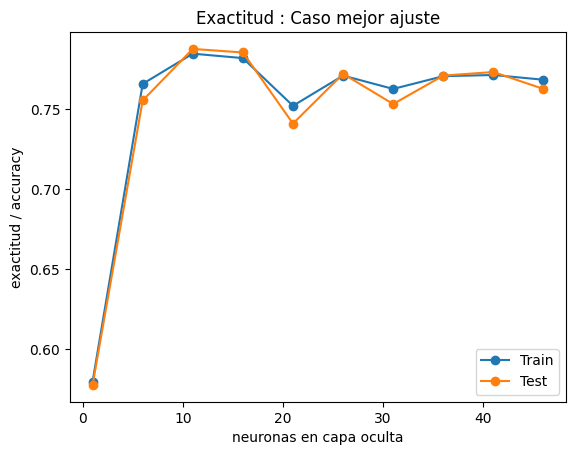

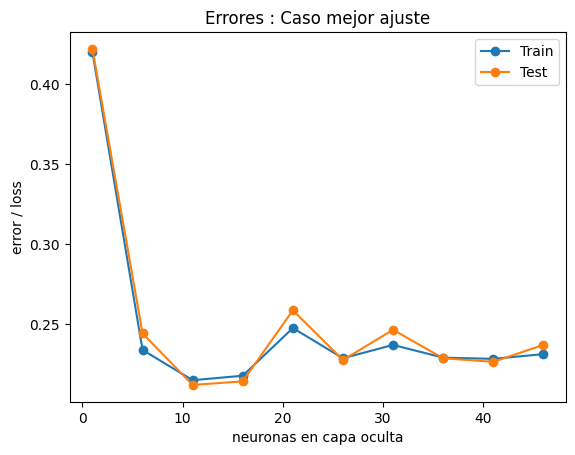

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier


# Impute NaN values in x_train, x_validation, and x_test
imputer = SimpleImputer(strategy='median')

x_train = imputer.fit_transform(x_train)
x_validation = imputer.transform(x_validation)
x_test = imputer.transform(x_test)


train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

neuronas = [i for i in range(1,50,5)]

for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes=(i,i),
                        max_iter=1000,
                        alpha=19,
                        random_state=42)

  model.fit(x_train, y_train)

  # TRAIN set
  train_yhat = model.predict(x_train)

  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)


  # TEST set
  test_yhat = model.predict(x_validation)

  test_loss = np.mean(abs(y_validation - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)


  # progreso de las épocas del entrenamiento ...
  print('>%d, train: %.3f, test: %.3f, losstrain: %.3f, losstest: %.3f' % (i, train_acc, test_acc, train_loss, test_loss))
  print(confusion_matrix(y_validation, test_yhat))

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('exactitud / accuracy')
plt.show()


plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.legend()
plt.title('Errores : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('error / loss')
plt.show()


exactitud: 0.7411111111111112


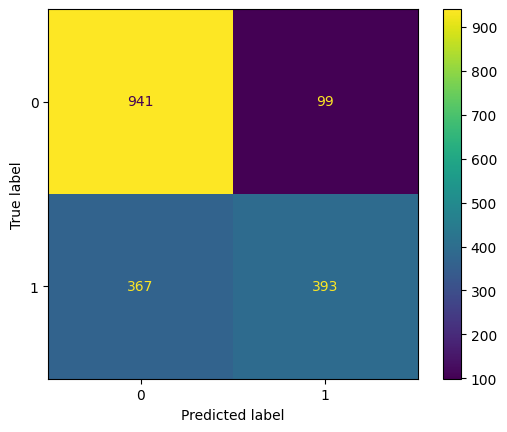

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# >21, train: 0.752, test: 0.741, losstrain: 0.248, losstest: 0.259



model = MLPClassifier(hidden_layer_sizes=(21,21),
                        max_iter=1000,
                        alpha=19,
                        random_state=42)
model.fit(x_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, x_validation, y_validation)
print(f'exactitud: {model.score(x_validation, y_validation)}')



12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

In [27]:
clf = LogisticRegression(C=np.float64(0.615848211066026), max_iter=1000, penalty='l2', solver='sag')
modelo_RL = clf.fit(x_train, y_train)


print('Regresion logística:\nExactitud (accuracy) con el conjunto de validación = ', modelo_RL.score(x_validation, y_validation) )

pr = modelo_RL.predict(x_test)

print('Matriz de confusión:\n', confusion_matrix(y_test, pr) )

Regresion logística:
Exactitud (accuracy) con el conjunto de validación =  0.8188888888888889
Matriz de confusión:
 [[867 175]
 [205 553]]


Encontramos que, en este caso particular, el modelo de regresión logística es el que presenta la mayor exactitud (sin sobreentrenar el modelo).

Me inclinaría a utilizar el modelo de red neuronal debido a que la cantidad de falsos positivos es significativamente menor, parámetro que podría ser relevante para el caso trabajado. Sin embargo, al ser mucho menor la exactitud, quedó descartado.